In [2]:
%matplotlib inline
import os
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib 

from climatools.scripts.g1_threshold import *

import IPython.display as display

In [3]:
analysis = Analysis()

In [4]:
crd = analysis.model('crd')
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'separate_g_groups',
                           'study__lblnew_g1_threshold',
                           'n2o',
                           'band07_wn_1215_1380',
                           'P_50_T_250',
                           '4.e-21',
                           'subarctic_winter')
crd.type_model = 'crd'
crd.linestyle = '-'
crd.load_data()

In [5]:
clirad = analysis.model('clirad')
clirad.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                             'clirad/LW/examples',
                             '1_0912_mdc_Steve_CLIRAD_lw',
                             'g1_threshold','n2o',
                             'band07_wn_1215_1380',
                             'P_50_T_250',
                             '4.e-21',
                             'subarctic_winter',
                             'weight_gk_linear_1_.5_.5_.5')
clirad.type_model = 'clirad'
clirad.linestyle = '--'
clirad.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig')
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])

In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

# Figure: flux, cooling rate. g-group 1

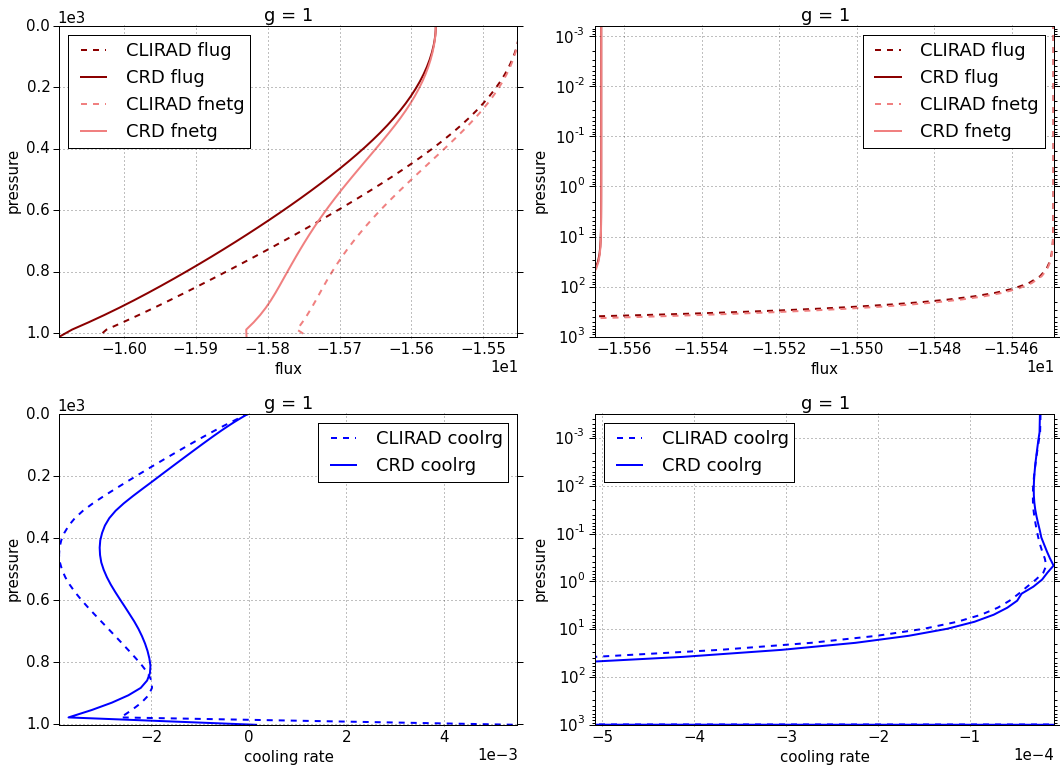

# Figure: flux, cooling rate. g-group 2

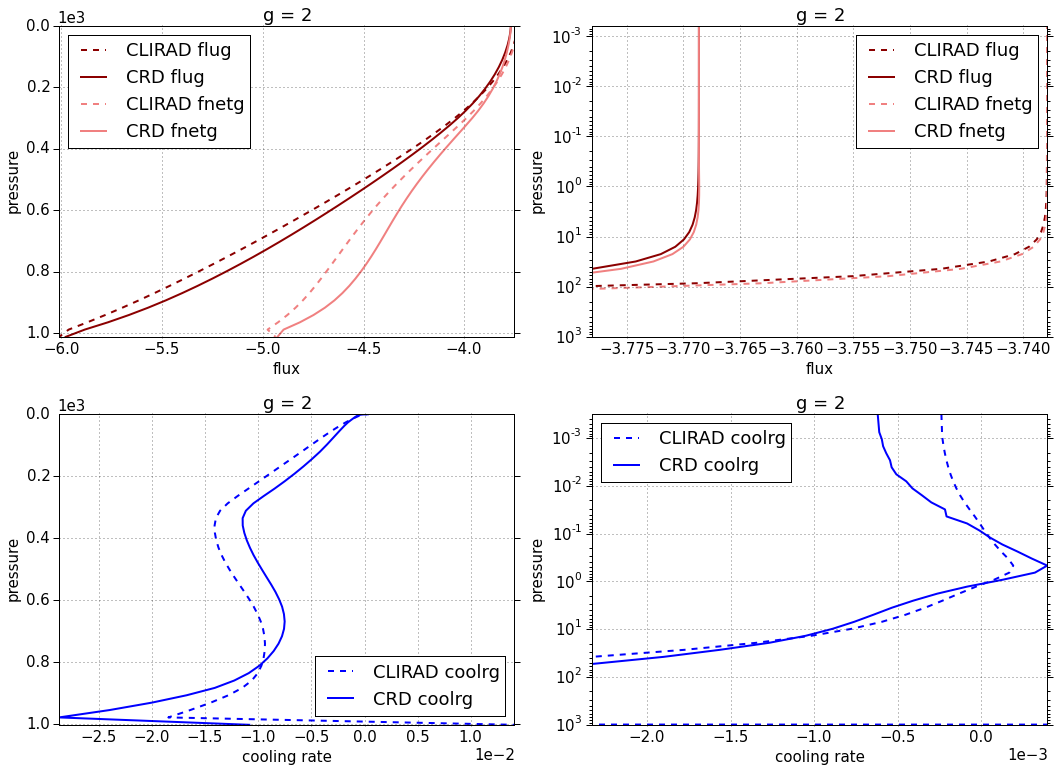

# Figure: flux, cooling rate. g-group 3

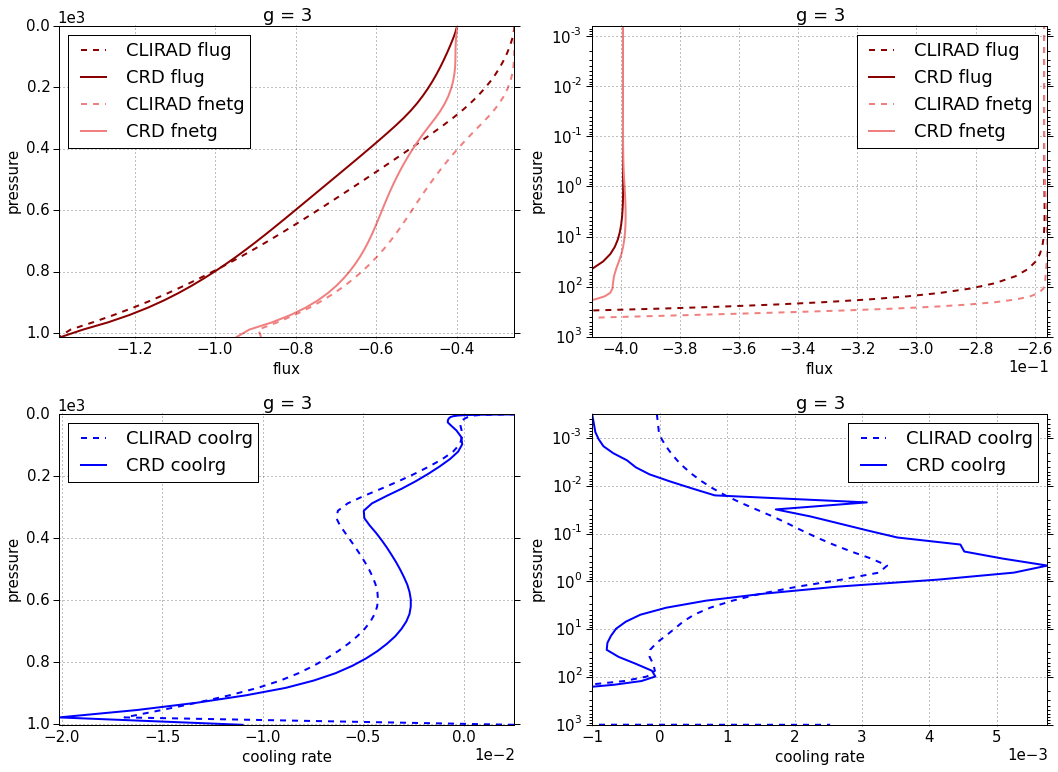

# Figure: flux, cooling rate. g-group 4

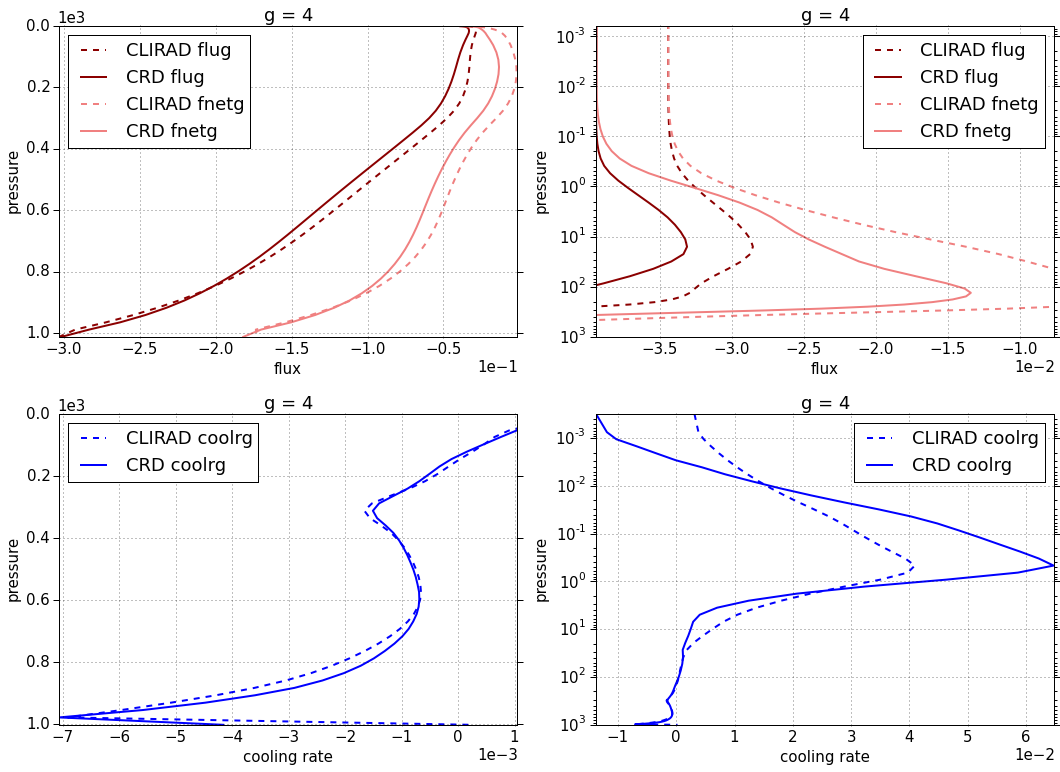

In [11]:
matplotlib.rcParams.update({'font.size': 15,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)

In [12]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.565956  0.000000 -15.565956
  1013     76    -16.090938  0.261223 -15.829715
2 0        1      -3.768629  0.000000  -3.768629
  1013     76     -5.979005  1.051442  -4.927563
3 0        1      -0.399236  0.000000  -0.399236
  1013     76     -1.383483  0.436753  -0.946730
4 0        1      -0.039409  0.000000  -0.039409
  1013     76     -0.301745  0.119844  -0.181901


CLIRAD


flug          fldg      fnetg
g pressure level                                    
1 0        1     -15.449186  2.911274e-13 -15.449186
  1013     76    -16.036479  2.926939e-01 -15.743785
2 0        1      -3.737895  5.227045e-12  -3.737895
  1013     76     -6.011898  1.074941e+00  -4.936957
3 0        1      -0.256808  2.547507e-11  -0.256808
  1013     76     -1.388980  5.026896e-01  -0.886291
4 0        1      -0.034426  5.708303e-10  -0.034426
  1013     76     -0.303245  1.302598e-01  -0.172985


CLIRAD - CRD


flug          fldg     fnetg
g pressure level                                  
1 0        1      0.116770  2.911274e-13  0.116770
  1013     76     0.054459  3.147136e-02  0.085930
2 0        1      0.030733  5.227045e-12  0.030733
  1013     76    -0.032892  2.349820e-02 -0.009394
3 0        1      0.142428  2.547507e-11  0.142428
  1013     76    -0.005498  6.593660e-02  0.060439
4 0        1      0.004982  5.708303e-10  0.004982
  1013     76    -0.001500  1.041608e-02  0.008916

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.000153
2 0.000312    1     -0.000620
  1001.112500 75    -0.010848
3 0.000312    1     -0.001003
  1001.112500 75    -0.011014
4 0.000312    1     -0.013756
  1001.112500 75    -0.004160


CLIRAD


coolrg
g pressure    layer          
1 0.000312    1     -0.000023
  1001.112500 75     0.005510
2 0.000312    1     -0.000238
  1001.112500 75     0.014077
3 0.000312    1     -0.000043
  1001.112500 75     0.002528
4 0.000312    1      0.003128
  1001.112500 75     0.000219


CLIRAD - CRD
Model indices not identical to benchmark indices, forcing model indices to be the same as benchmark's


coolrg
g pressure    layer              
1 0.000312    1      6.546360e-07
  1001.112500 75     5.356727e-03
2 0.000312    1      3.814458e-04
  1001.112500 75     2.492530e-02
3 0.000312    1      9.601171e-04
  1001.112500 75     1.354193e-02
4 0.000312    1      1.688406e-02
  1001.112500 75     4.378597e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-19.773229,0.000000,-19.773229
1013,76,-23.755171,1.869262,-21.885909



CLIRAD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-19.478315,6.018236e-10,-19.478315
1013,76,-23.740602,2.000584e+00,-21.740018



CLIRAD - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.294914,6.018236e-10,0.294914
1013,76,0.014569,1.313222e-01,0.145891


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.015403
1001.112500,75,-0.025869



CLIRAD


,,coolrg
pressure,layer,
0.000312,1,0.002824
1001.112500,75,0.022334



CLIRAD - CRD
Model indices not identical to benchmark indices, forcing model indices to be the same as benchmark's


,,coolrg
pressure,layer,
0.000312,1,0.018226
1001.112500,75,0.048203


In [13]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')